In [1]:
library(lmtest)
library(nlme)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# Часть 1

In [2]:
generate_regression <- function(x, a, b, lambda){
    
    y <- rep(1,length(x))
    sigma <- rep(1,length(x))
    
    for (i in 2:length(x)){
        sigma[i] <- lambda * sigma[i-1] +  rnorm(1, mean = 0, sd = 1)
    }
    
    for (i in 1:length(x)){
        y[i] <- a + b * x[i] + sigma[i]
    }

    return ( y )
}


# generate_regression_ar1 <- function(x, a, b, lambda) {
#   n <- length(x)
#   epsilon <- rep(0, n)
  
#   for (i in 2:n) {
#     epsilon[i] <- lambda * epsilon[i - 1] + rnorm(1, mean = 0, sd = 1)
#   }

#   y <- a + b * x + epsilon

#   return(list(y = y, epsilon = epsilon))
# }

## Генерация выборки с корреляцией

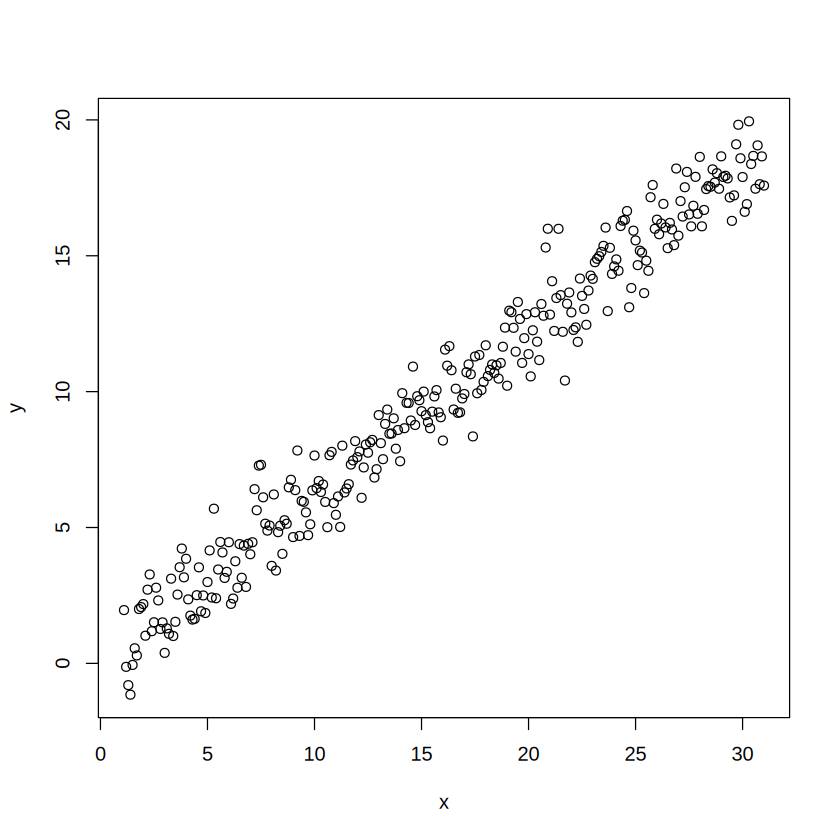

In [3]:
n <- 300
i <- 1:n
x <- 1 + 0.1 * i
y <- generate_regression(x, .3, .6, .2)
plot(x, y, type = "p") 

### тест Дарбина-Уотсона 

In [4]:
residuals <- lm(y~x)$residuals

n <- length(residuals)
sum_squared_diff <- sum(diff(residuals)^2)
sum_squared_residuals <- sum(residuals^2)
durbin_watson_statistic <- sum_squared_diff / sum_squared_residuals
durbin_watson_statistic

[1] 1.612407

Проверю значение библиотечным тестом

In [5]:
dwtest(lm(y~x))


	Durbin-Watson test

data:  lm(y ~ x)
DW = 1.6124, p-value = 0.0003059
alternative hypothesis: true autocorrelation is greater than 0


### ДОМНК 

In [6]:
X <- cbind(1, x)
teta <- solve(t(X) %*% X) %*% t(X) %*% y
teta
# y_pred <- X %*% teta
# residuals <- y - y_pred

,0.09020779
x,0.60744405


**Вроде все правильно**

In [7]:
gls(y ~ x, correlation = corAR1())

Generalized least squares fit by REML
  Model: y ~ x 
  Data: NULL 
  Log-restricted-likelihood: -424.9538

Coefficients:
(Intercept)           x 
 0.09680067  0.60702630 

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.1978971 
Degrees of freedom: 300 total; 298 residual
Residual standard error: 1.002076 

## Гетероскедастичность

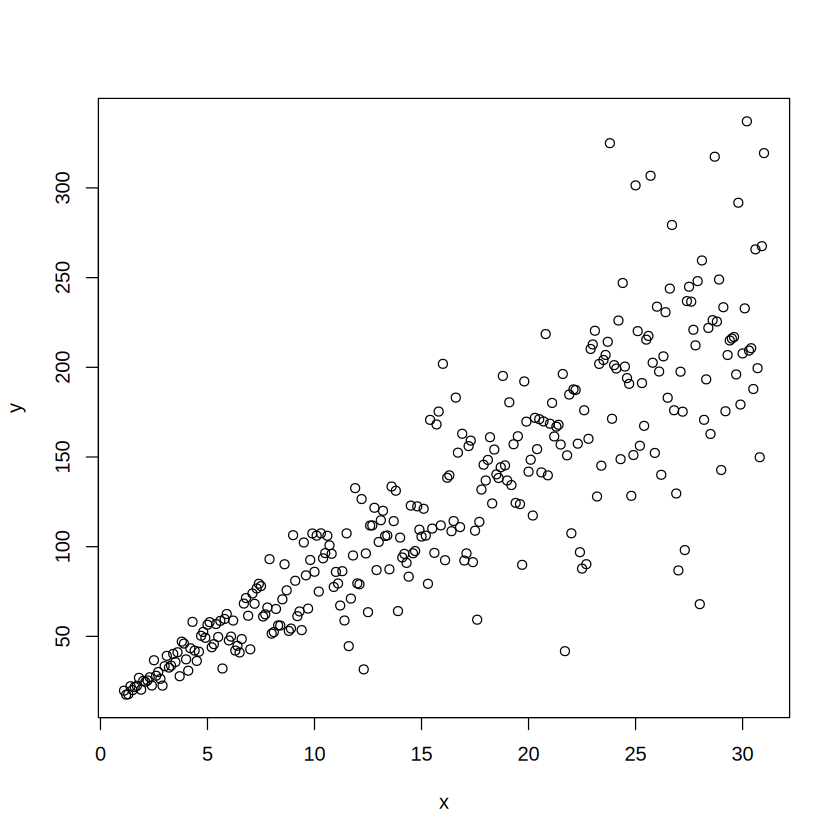

In [8]:
e <- x*rnorm(n,0,2)
y <- 12+7*x+e
plot(y~x)

In [9]:
model <- summary(lm(y~x))

In [10]:
gqtest(model)


	Goldfeld-Quandt test

data:  model
GQ = 5.878, df1 = 148, df2 = 148, p-value < 2.2e-16
alternative hypothesis: variance increases from segment 1 to 2


### ОМНК

In [11]:
G <- diag(1,n)
for (i in 1:n)
{
  for(j in 1:n)
    G[i,j] <- 2^abs(i - j)
}
x0 = rep(1,n)
Y = matrix(c(y),n,1)
X = matrix(c(x0,x),n,2)
teta = solve(t(X)%*%solve(G)%*%X)%*%t(X)%*%solve(G)%*%Y
teta

ERROR: Error in solve.default(G): system is computationally singular: reciprocal condition number = 1.63636e-91


# Часть 2

In [16]:
data <- read.table(file = "../Data/flats_1.txt", header = TRUE)
data
model <- lm(Rent ~ M2, data = data)
summary(model)

Type,Rent,Floor,Total,M2,F
<chr>,<int>,<int>,<int>,<dbl>,<chr>
st,8500,1,5,15.0,no
st,9000,1,5,14.0,no
st,9500,8,9,15.0,yes
st,8000,1,5,12.2,yes
st,9000,2,5,18.0,yes
st,9000,1,5,14.0,yes
st,10000,2,5,19.0,yes
st,8000,1,5,14.0,no
st,6500,1,3,13.0,yes



Call:
lm(formula = Rent ~ M2, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12529.4  -1374.1   -381.2    432.1  11110.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7391.8     1335.5   5.535 1.28e-06 ***
M2             165.9       42.2   3.931 0.000271 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3474 on 48 degrees of freedom
Multiple R-squared:  0.2435,	Adjusted R-squared:  0.2278 
F-statistic: 15.45 on 1 and 48 DF,  p-value: 0.0002708


In [30]:
model <- lm(Rent ~ M2, data = data)
shapiro.test(model$residuals)


	Shapiro-Wilk normality test

data:  model$residuals
W = 0.7906, p-value = 5.361e-07


In [38]:
gqtest(model)


	Goldfeld-Quandt test

data:  model
GQ = 7.0517, df1 = 23, df2 = 23, p-value = 7.421e-06
alternative hypothesis: variance increases from segment 1 to 2


In [39]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 2.504, p-value = 0.9599
alternative hypothesis: true autocorrelation is greater than 0


Присутствует **гетероскедастичность**

In [40]:

# y = data$Price / data$M2
# x = 1/data$M2

In [41]:
model2 <- lm( (Rent / M2) ~ (1/M2) ,data = data)
summary(model2)


Call:
lm(formula = (Rent/M2) ~ (1/M2), data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-533.2 -215.8 -147.5  -12.0 5773.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    560.3      119.4   4.693  2.2e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 844.2 on 49 degrees of freedom


In [42]:
shapiro.test(model2$residuals)


	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.24703, p-value = 1.401e-14


In [43]:
gqtest(model2)


	Goldfeld-Quandt test

data:  model2
GQ = 80.091, df1 = 24, df2 = 24, p-value < 2.2e-16
alternative hypothesis: variance increases from segment 1 to 2
